In [79]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)  

data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [80]:
data.head() #Sibsp: 함께 탑승한 형제 및 배우자의 수, Parch: 함께 탑승한 부모 및 자녀의 수

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [81]:
data.info() # Object type: Name, Sex, Ticket, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [82]:
data.describe() # Float 과 int type 통계 정보 출력

# p class에서 1~3 까지 있음, Age는 25%가 22세 75%가 35세 미만 이지만 최고 80세 까지 있음

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [83]:
data.select_dtypes(include=['number']).corr() # Parch 와 SibSp 의 상관관계가 가장 높음 0.41

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

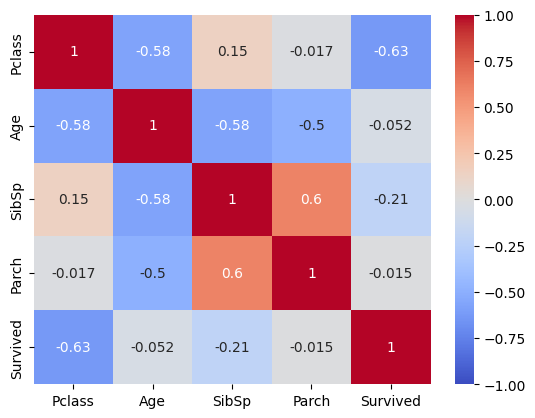

In [85]:
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True) # Parch와 sibsp의 상관관계가 가장 큰것을 확인할 수 있다.
plt.show()

In [86]:
data['Name'].nunique() # 원 핫 인코딩으로 변환이 쉽지 않다

889

In [87]:
data['Sex'].nunique() # 원 핫 인코딩으로 변환 가능

2

In [36]:
data['Ticket'].nunique() # 원 핫 인코딩으로 변환이 쉽지 않다


680

In [37]:
data['Embarked'].nunique() #원 핫 인코딩으로 변환 가능


3

In [38]:
data = data.drop(['Name','Ticket'], axis=1) #필요없는 coulmn 삭제 

In [39]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [40]:
pd.get_dummies(data, columns=['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [59]:
final_data = pd.get_dummies(data, columns=['Sex', 'Embarked'],drop_first=True) # drop_first 사용하여 필요있는 컬럼만 남겨 놓는다.
final_data 

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [60]:
from sklearn.model_selection import train_test_split

X = final_data.drop('Survived', axis = 1) # 데이터셋에 종속 변수 제거 후 저장
y = final_data['Survived'] # 종속 변수만 저장
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [62]:
pred = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test,pred) # 78%의 정확도를 보여주고 있다



0.7808988764044944

In [65]:
model.coef_ # 이중 리스트 

array([[-1.18229358, -0.03992144, -0.3213057 ,  0.00796955, -2.56870819,
        -0.07884746, -0.23556205]])

In [66]:
pd.Series(model.coef_[0], index = X.columns) # pd.Series(model.coef_, index = X.columns) 이렇게 사용하면 에러 뜬다 cause 이중 리스트

#분석 내용 

# 각 계수 값이 Survived에 미치는 영향 : Pclass가 음수 이기 떄문에 pclass 가 높을수록 생존 확률 높아짐, 또한 age도 음수 이기때문에 나이가 낮을 수록 생존 확률 높아짐 이런식으로 각 계수 분석 하면 됨!


Pclass       -1.182294
Age          -0.039921
SibSp        -0.321306
Parch         0.007970
Sex_male     -2.568708
Embarked_Q   -0.078847
Embarked_S   -0.235562
dtype: float64

In [78]:
data

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0
...,...,...,...,...,...
884,2,male,27.0,S,0
885,1,female,19.0,S,1
886,3,female,28.0,S,0
887,1,male,26.0,C,1
